# Project 1

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
from keras.layers import Dropout
import numpy as np
import pandas as pd
np.random.seed(7)

In [5]:
#Load data to and assign data to data
data = np.loadtxt('/Users/wubing/Desktop/kz/pima-indians-diabetes.csv', delimiter=",")

#Assign first 8 columns to X
X = data[:,0:8]
#Assign 9th column to Y
Y = data[:,8]

OSError: /Users/wubing/Desktop/kz/pima-indians-diabetes.csv not found.

In [6]:
#Define Model

#Build a blank model
model = Sequential()
#Add the first layer of the model with 12 nodes, input dimension is 8 and the activation function 
#of the first layer is relu
model.add(Dense(12, input_dim=8, activation='relu'))
#Add the second layer of the model with 8 nodes, activation function is relu
model.add(Dense(8, activation='relu'))
#Add the output layer of the model with 1 nodes, activation function is sigmoid
model.add(Dense(1, activation='sigmoid'))

In [7]:
#Compile the model with loss function binary_crossentropy, optimizer is adam and metrics is accuracy
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
#Fit model with X and Y, epochs is 150, batch_size is 10
model.fit(X, Y, epochs=150, batch_size=10)

NameError: name 'X' is not defined

In [9]:
#Evaluate model

#get the score for loss and accuracy
scores = model.evaluate(X, Y)
#set the name to string and get the accuracy
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

NameError: name 'X' is not defined

# Project 2

In [68]:
#Load data to and assign data to tdata
tdata = pd.read_csv('/Users/wubing/Dropbox/KZ/train_validation.csv',
                    sep=',', encoding = 'latin1')
tdata.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [69]:
#Slicing traing set and validation set 

train_set = tdata.iloc[0:80000, 1:3]
va_set = tdata.iloc[80000:100000, 1:3]
print(train_set.head())
print(va_set.head())

   Sentiment                                      SentimentText
0          0                       is so sad for my APL frie...
1          0                     I missed the New Moon trail...
2          1                            omg its already 7:30 :O
3          0            .. Omgaga. Im sooo  im gunna CRy. I'...
4          0           i think mi bf is cheating on me!!!   ...
       Sentiment                                      SentimentText
80000          1  @cantyka hallo juga  thanks ya udah di follow....
80001          1                     @cantyka thanks for following 
80002          1  @canuck1975 You look like you had a really gre...
80003          1  @CanuckBlondie find WHATEVER means necessary!!!! 
80004          1  @CanuckBlondie watched phones never ring, hop ...
<class 'pandas.core.frame.DataFrame'>


## Preprocessing and cleaning

In [44]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
%matplotlib inline

### Removing @ because they don't convery much information

In [71]:
#First combine two sets of text. Then we don't need to do the same processing twice.
combi = train_set.append(va_set, ignore_index=True)
print(combi.head())

#Define a function to remove the unwanted patterns
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt 

# remove twitter @user
combi['new'] = np.vectorize(remove_pattern)(combi['SentimentText'], '@[\w]*')
combi

   Sentiment                                      SentimentText
0          0                       is so sad for my APL frie...
1          0                     I missed the New Moon trail...
2          1                            omg its already 7:30 :O
3          0            .. Omgaga. Im sooo  im gunna CRy. I'...
4          0           i think mi bf is cheating on me!!!   ...


,Sentiment,SentimentText,new
0,0,is so sad for my APL frie...,is so sad for my APL frie...
1,0,I missed the New Moon trail...,I missed the New Moon trail...
2,1,omg its already 7:30 :O,omg its already 7:30 :O
3,0,.. Omgaga. Im sooo im gunna CRy. I'...,.. Omgaga. Im sooo im gunna CRy. I'...
4,0,i think mi bf is cheating on me!!! ...,i think mi bf is cheating on me!!! ...
5,0,or i just worry too much?,or i just worry too much?
6,1,Juuuuuuuuuuuuuuuuussssst Chillin!!,Juuuuuuuuuuuuuuuuussssst Chillin!!
7,0,Sunny Again Work Tomorrow :-| ...,Sunny Again Work Tomorrow :-| ...
8,1,handed in my uniform today . i miss you ...,handed in my uniform today . i miss you ...
9,1,hmmmm.... i wonder how she my number @-),hmmmm.... i wonder how she my number -)


### Removing Punctuations, Numbers, and Special Characters

In [72]:
# remove special characters, numbers, punctuations
combi['new'] = combi['new'].str.replace("[^a-zA-Z#]", " ")
combi

,Sentiment,SentimentText,new
0,0,is so sad for my APL frie...,is so sad for my APL frie...
1,0,I missed the New Moon trail...,I missed the New Moon trail...
2,1,omg its already 7:30 :O,omg its already O
3,0,.. Omgaga. Im sooo im gunna CRy. I'...,Omgaga Im sooo im gunna CRy I ...
4,0,i think mi bf is cheating on me!!! ...,i think mi bf is cheating on me ...
5,0,or i just worry too much?,or i just worry too much
6,1,Juuuuuuuuuuuuuuuuussssst Chillin!!,Juuuuuuuuuuuuuuuuussssst Chillin
7,0,Sunny Again Work Tomorrow :-| ...,Sunny Again Work Tomorrow ...
8,1,handed in my uniform today . i miss you ...,handed in my uniform today i miss you ...
9,1,hmmmm.... i wonder how she my number @-),hmmmm i wonder how she my number


### Removing Short Words

In [47]:
combi['new'] = combi['new'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 0]))
combi.head()

,Sentiment,SentimentText,new
0,0,is so sad for my APL frie...,is so sad for my APL friend
1,0,I missed the New Moon trail...,I missed the New Moon trailer
2,1,omg its already 7:30 :O,omg its already O
3,0,.. Omgaga. Im sooo im gunna CRy. I'...,Omgaga Im sooo im gunna CRy I ve been at this ...
4,0,i think mi bf is cheating on me!!! ...,i think mi bf is cheating on me T T


### Tokenization

In [84]:
tokenized_tweet = combi['new'].apply(lambda x: x.split())
tokenized_tweet.head()

0                  [is, so, sad, for, my, APL, friend]
1                 [I, missed, the, New, Moon, trailer]
2                               [omg, its, already, O]
3    [Omgaga, Im, sooo, im, gunna, CRy, I, ve, been...
4       [i, think, mi, bf, is, cheating, on, me, T, T]
Name: new, dtype: object

In [85]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0                  [is, so, sad, for, my, apl, friend]
1                   [I, miss, the, new, moon, trailer]
2                                [omg, it, alreadi, O]
3    [omgaga, Im, sooo, im, gunna, cri, I, ve, been...
4          [i, think, mi, bf, is, cheat, on, me, T, T]
Name: new, dtype: object

In [86]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

tdata['new'] = tokenized_tweet

### Skip Stemming because I don't understand

## Story Generation and Visualization from Tweets
Before we begin exploration, we must think and ask questions related to the data in hand. A few probable questions are as follows:

-  What are the most common words in the entire dataset?
-  What are the most common words in the dataset for negative and positive tweets, respectively?
-  How many hashtags are there in a tweet?
-  Which trends are associated with my dataset?
-  Which trends are associated with either of the sentiments? Are they compatible with the sentiments?

### Understanding the common words used in the tweets: WordCloud

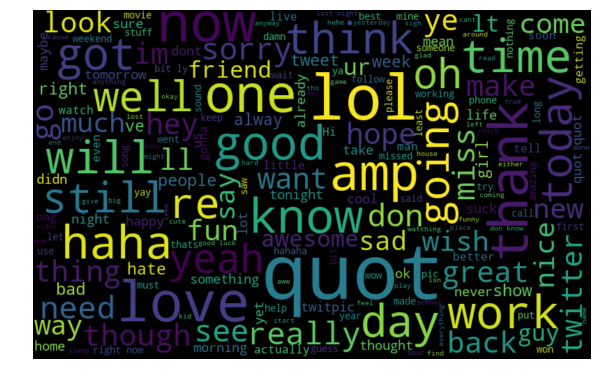

In [49]:
all_words = ' '.join([text for text in combi['new']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

We can see most of the words are positive or neutral. With happy and love being the most frequent ones. It doesn’t give us any idea about the words associated with the racist/sexist tweets. Hence, we will plot separate wordclouds for both the classes(racist/sexist or not) in our train data.
### Words in non racist/sexist tweets

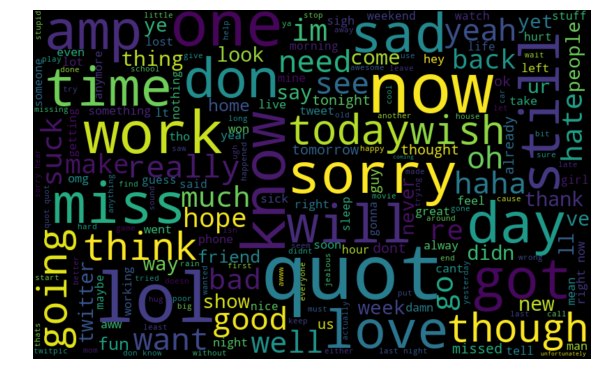

In [50]:
normal_words =' '.join([text for text in combi['new'][combi['Sentiment'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Racist/Sexist Tweets

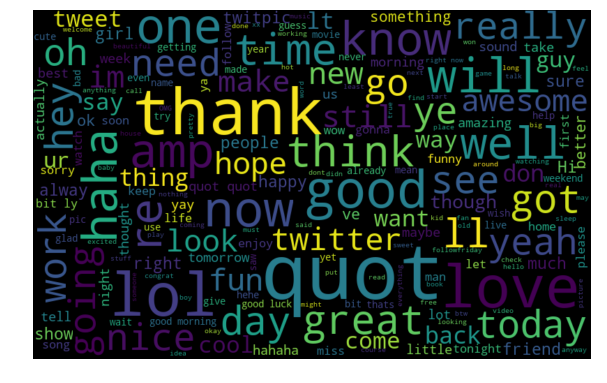

In [51]:
negative_words = ' '.join([text for text in combi['new'][combi['Sentiment'] == 1]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

I still don't see many negtive words here, this is probabily because the dataset isn't large rnough. 
We don't have a good data set, how to handle this?

### Understanding the impact of Hashtags on tweets sentiment

In [52]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [53]:
# extracting hashtags from non racist/sexist tweets

HT_regular = hashtag_extract(combi['new'][combi['Sentiment'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(combi['new'][combi['Sentiment'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

#### Non-Racist/Sexist Tweets

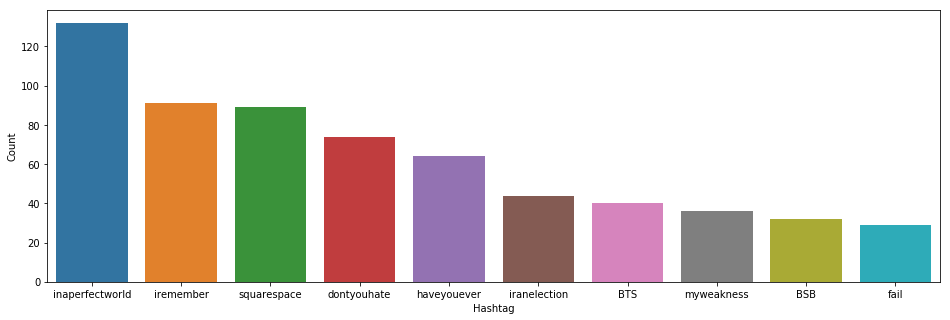

In [54]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

#### Racist/Sexist Tweets

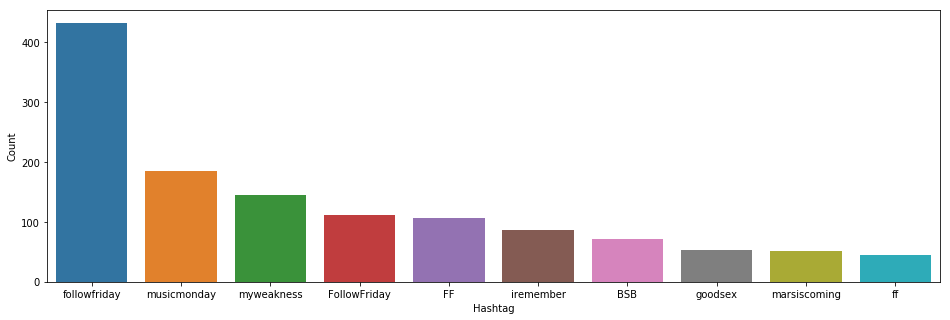

In [55]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

Some are surely bad. Then it's a good idea to include the hashtag to our analysis
## Extracting Features from Cleaned Tweets
### Bag-of-Words Features

In [56]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=3000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(combi['new'])
print(bow.shape)

(99989, 3000)


In [87]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=3000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(tdata['new'])
print(bow.shape)

(99989, 3000)


## Model Building: Sentiment Analysis
### NN
#### Building model using Bag-of-Words features

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(bow, tdata['Sentiment'], random_state=42, 
                                                          test_size=0.2)

In [58]:
#Now I am adjusting my model, how to improve it?
#How many layers? How many notes for each layer? What is the activaetion function for each layer.
#Do I need other tactics to prevent overfitting?

In [93]:
#NN Modeling building
import keras
#Define model
model = Sequential()
model.add(Dense(100, input_dim=3000, activation='tanh', kernel_initializer=keras.initializers.he_uniform(seed=7),
                bias_initializer='zeros'))
model.add(Dropout(0.3))
model.add(Dense(100, activation='relu', kernel_initializer=keras.initializers.he_uniform(seed=7),
                bias_initializer='zeros'))
model.add(Dropout(0.3))
model.add(Dense(100, activation='relu', kernel_initializer=keras.initializers.he_uniform(seed=7),
                bias_initializer='zeros'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

In [94]:
#Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [95]:
#Fit model
model.fit(xtrain_bow, ytrain, epochs=10, batch_size=10000)
keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, 
                              mode='auto', baseline=None, restore_best_weights=True)

Epoch 1/10
79991/79991 [==============================] - 6s 76us/step - loss: 0.6783 - acc: 0.5686
Epoch 2/10
79991/79991 [==============================] - 4s 56us/step - loss: 0.6314 - acc: 0.6360
Epoch 3/10
79991/79991 [==============================] - 5s 60us/step - loss: 0.5672 - acc: 0.7201
Epoch 4/10
79991/79991 [==============================] - 5s 60us/step - loss: 0.5293 - acc: 0.7433
Epoch 5/10
79991/79991 [==============================] - 5s 60us/step - loss: 0.5107 - acc: 0.7553
Epoch 6/10
79991/79991 [==============================] - 5s 59us/step - loss: 0.4996 - acc: 0.7607
Epoch 7/10
79991/79991 [==============================] - 4s 54us/step - loss: 0.4938 - acc: 0.7636
Epoch 8/10
79991/79991 [==============================] - 4s 54us/step - loss: 0.4874 - acc: 0.7670
Epoch 9/10
79991/79991 [==============================] - 5s 62us/step - loss: 0.4828 - acc: 0.7695
Epoch 10/10
79991/79991 [==============================] - 4s 54us/step - loss: 0.4794 - acc: 0.7709

In [96]:
#Evaluate
scores = model.evaluate(xvalid_bow, yvalid)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print(scores)
print(model.metrics_names)

19998/19998 [==============================] - 2s 106us/step

acc: 74.55%
[0.5186649866194257, 0.7455245524492845]
['loss', 'acc']


In [92]:
#Evaluate
scores = model.evaluate(xvalid_bow, yvalid)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print(scores)
print(model.metrics_names)

19998/19998 [==============================] - 2s 102us/step

acc: 74.44%
[0.5241028694632482, 0.7444244424800108]
['loss', 'acc']


### Reference
https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/